In [172]:
import pandas as pd
import numpy as np

In [173]:
import warnings
warnings.filterwarnings('ignore')

### 1. Загрузите данные по вариантам в ноутбук.

In [174]:
df = pd.read_excel('Вариант 2.xlsx', skiprows=2)
df.drop(len(df) - 1, inplace=True)
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,124.0,11,Ж,341.0,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
1,2.0,128.0,11,Ж,345.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
2,3.0,132.0,11,Ж,340.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
3,4.0,134.0,11,Ж,339.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
4,5.0,136.0,11,Ж,348.0,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
2351,2352.0,136.0,11,М,337.0,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25.0,92.0,27.0
2352,2353.0,136.0,11,М,341.0,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25.0,92.0,27.0
2353,2354.0,136.0,11,М,341.0,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27.0,96.0,27.0
2354,2355.0,136.0,11,М,343.0,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27.0,96.0,27.0


### 2. Сделайте описательную статистику полученных данных.

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   №                              2356 non-null   float64
 1   № школы                        2356 non-null   float64
 2   Класс                          2356 non-null   object 
 3   Пол                            2356 non-null   object 
 4   Номер варианта                 2356 non-null   float64
 5   Задания с кратким ответом      2356 non-null   object 
 6   Задания с развёрнутым ответом  2356 non-null   object 
 7   Устная часть                   0 non-null      object 
 8   Первичный балл                 2356 non-null   float64
 9   Балл                           2356 non-null   float64
 10  Минимальный балл               2356 non-null   float64
dtypes: float64(6), object(5)
memory usage: 202.6+ KB


### 3. Найдите процент учащихся, выполнивших работу ниже среднего.

In [176]:
print(f"{len(df[df['Балл'] < df['Балл'].mean()]) / len(df) * 100:.2f}%")

48.01%


### 4. Найти процент учащихся не сдавших экзамен.

In [177]:
print(f"{len(df[df['Балл'] < df['Минимальный балл']]) / len(df) * 100:.2f}%")

9.21%


### 5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

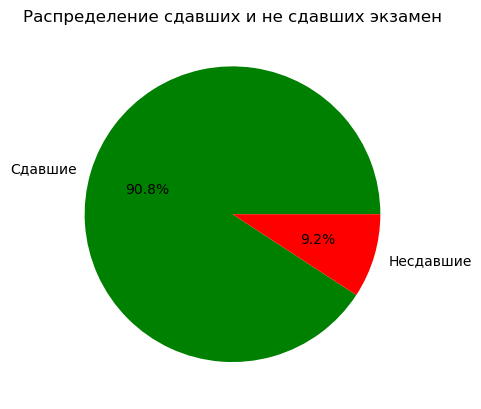

In [179]:
passed = len(df[df['Балл'] >= df['Минимальный балл']])
failed = len(df[df['Балл'] < df['Минимальный балл']])

labels = ['Сдавшие', 'Несдавшие']
sizes = [passed, failed]
colors = ['g', 'r']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Распределение сдавших и не сдавших экзамен')
plt.show()

### 6. Постройте ядерную оценку плотности распределению баллов за экзамен.

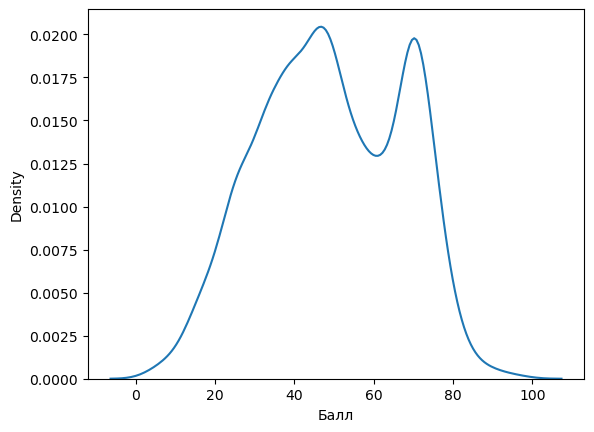

In [180]:
sns.kdeplot(df['Балл'])
plt.show()

### 7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [181]:
print(f"Неудовлетворительно: {(len(df[df['Балл'] < 27]) / len(df)) * 100:.2f}%")
print(f"Удовлетворительно: {((len(df[(27 <= df['Балл']) & (df['Балл'] < 50)])) / len(df)) * 100:.2f}%")
print(f"Хорошо: {((len(df[(50 <= df['Балл']) & (df['Балл'] < 68)])) / len(df)) * 100:.2f}%")
print(f"Отлично: {(len(df[df['Балл'] >= 68]) / len(df)) * 100:.2f}%")

Неудовлетворительно: 9.21%
Удовлетворительно: 38.79%
Хорошо: 26.40%
Отлично: 25.59%


### 8. Какое процентное соотношение юношей и девушек писало данный экзамен?

In [182]:
print(f"Юноши: {len(df[df['Пол'] == 'М']) / len(df) * 100:.2f}%")
print(f"Девушки: {len(df[df['Пол'] == 'Ж']) / len(df) * 100:.2f}%")

Юноши: 47.16%
Девушки: 52.84%


### 9. Сколько школ принимало участие в экзамене?

In [183]:
df['№ школы'].nunique()

17

### 10. Сколько всего заданий с кратким ответом? С развернутым ответом?

In [184]:
print(f"Заданий с картким ответом: {len(df.iloc[0]['Задания с кратким ответом'])}")
print(f"Задания с развёрнутым ответом: {df.iloc[0]['Задания с развёрнутым ответом'].count('(')}")

Заданий с картким ответом: 12
Задания с развёрнутым ответом: 7


### 11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: B1, ... Bk
### Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [185]:
count = len(df)
for i in range(12):
    counter = 0
    for j in range(count):
        counter += df.iloc[j]['Задания с кратким ответом'][i] == '+'
    print(f"B{i+1} Выполнено: {counter / count * 100:.2f}% Невыполнено: {(count - counter) / count * 100:.2f}%")

B1 Выполнено: 89.26% Невыполнено: 10.74%
B2 Выполнено: 95.33% Невыполнено: 4.67%
B3 Выполнено: 92.78% Невыполнено: 7.22%
B4 Выполнено: 91.00% Невыполнено: 9.00%
B5 Выполнено: 88.50% Невыполнено: 11.50%
B6 Выполнено: 73.17% Невыполнено: 26.83%
B7 Выполнено: 37.48% Невыполнено: 62.52%
B8 Выполнено: 47.84% Невыполнено: 52.16%
B9 Выполнено: 91.85% Невыполнено: 8.15%
B10 Выполнено: 71.48% Невыполнено: 28.52%
B11 Выполнено: 59.25% Невыполнено: 40.75%
B12 Выполнено: 46.22% Невыполнено: 53.78%


### 12. Аналогично и с типом С (ответы с развернутым ответом)

In [186]:
count = len(df)
for i in range(7):
    counter = 0
    for j in range(count):
        counter += df.iloc[j]['Задания с развёрнутым ответом'][i * 4] == df.iloc[j]['Задания с развёрнутым ответом'][i * 4 + 2]
    print(f"С{i+1} Выполнено: {counter / count * 100:.2f}% Невыполнено: {(count - counter) / count * 100:.2f}%")

С1 Выполнено: 26.15% Невыполнено: 73.85%
С2 Выполнено: 7.47% Невыполнено: 92.53%
С3 Выполнено: 12.56% Невыполнено: 87.44%
С4 Выполнено: 0.51% Невыполнено: 99.49%
С5 Выполнено: 1.10% Невыполнено: 98.90%
С6 Выполнено: 0.38% Невыполнено: 99.62%
С7 Выполнено: 0.04% Невыполнено: 99.96%


### 13. Сделайте анализ по двум школам:
### 1) по всем выполненным заданиям типа В
### 2) по заданиям типа С больше 50%
### 3) по среднему баллу юношей и девушек

In [187]:
school_counts = df.groupby('№ школы').size()
school_counts

№ школы
121.0      81
122.0      54
123.0     111
124.0      35
125.0      77
126.0      71
127.0     176
128.0     113
129.0      33
130.0      26
131.0      50
132.0     104
133.0     115
134.0      20
135.0     182
136.0    1020
137.0      88
dtype: int64

In [188]:
school135 = df[df['№ школы'] == 135]
school135

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
15,16.0,135.0,12,М,339.0,++----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,2.0,9.0,27.0
39,40.0,135.0,12,М,337.0,-+-++-------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,3.0,14.0,27.0
80,81.0,135.0,13,М,103.0,+++-+-------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,4.0,18.0,27.0
81,82.0,135.0,11,Ж,348.0,++-+----+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,4.0,18.0,27.0
82,83.0,135.0,12,М,339.0,+++------+--,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,4.0,18.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
2170,2171.0,135.0,11,М,348.0,++++++++++++,2(2)0(2)2(2)0(3)0(3)0(4)0(4),NaN,16.0,74.0,27.0
2171,2172.0,135.0,11,Ж,342.0,++++++++++++,2(2)0(2)2(2)0(3)0(3)0(4)0(4),NaN,16.0,74.0,27.0
2238,2239.0,135.0,11,М,347.0,++++++++++++,2(2)0(2)2(2)0(3)0(3)0(4)1(4),NaN,17.0,76.0,27.0
2284,2285.0,135.0,11,Ж,345.0,+++++++-++++,2(2)2(2)2(2)0(3)1(3)0(4)0(4),NaN,18.0,78.0,27.0


In [189]:
count = len(school135)
for i in range(12):
    counter = 0
    for j in range(count):
        counter += school135.iloc[j]['Задания с кратким ответом'][i] == '+'
    print(f"B{i+1} Выполнено: {counter / count * 100:.2f}% Невыполнено: {(count - counter) / count * 100:.2f}%")

B1 Выполнено: 88.46% Невыполнено: 11.54%
B2 Выполнено: 96.15% Невыполнено: 3.85%
B3 Выполнено: 91.76% Невыполнено: 8.24%
B4 Выполнено: 85.71% Невыполнено: 14.29%
B5 Выполнено: 91.76% Невыполнено: 8.24%
B6 Выполнено: 71.98% Невыполнено: 28.02%
B7 Выполнено: 39.01% Невыполнено: 60.99%
B8 Выполнено: 43.96% Невыполнено: 56.04%
B9 Выполнено: 89.56% Невыполнено: 10.44%
B10 Выполнено: 72.53% Невыполнено: 27.47%
B11 Выполнено: 54.95% Невыполнено: 45.05%
B12 Выполнено: 42.86% Невыполнено: 57.14%


In [190]:
count = len(school135)
for i in range(7):
    counter = 0
    for j in range(count):
        counter += int(school135.iloc[j]['Задания с развёрнутым ответом'][i * 4]) > int(school135.iloc[j]['Задания с развёрнутым ответом'][i * 4 + 2]) / 2
    print(f"С{i+1} Выполнено: {counter / count * 100:.2f}% Невыполнено: {(count - counter) / count * 100:.2f}%")

С1 Выполнено: 22.53% Невыполнено: 77.47%
С2 Выполнено: 3.85% Невыполнено: 96.15%
С3 Выполнено: 6.59% Невыполнено: 93.41%
С4 Выполнено: 0.55% Невыполнено: 99.45%
С5 Выполнено: 0.55% Невыполнено: 99.45%
С6 Выполнено: 0.00% Невыполнено: 100.00%
С7 Выполнено: 0.00% Невыполнено: 100.00%


In [191]:
print(f"Юноши: {school135[school135['Пол'] == 'М']['Балл'].mean()}")
print(f"Девушки: {school135[school135['Пол'] == 'Ж']['Балл'].mean()}")

Юноши: 47.04081632653061
Девушки: 48.42857142857143


In [192]:
school136 = df[df['№ школы'] == 136]
school136

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
4,5.0,136.0,11,Ж,348.0,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
5,6.0,136.0,11,М,342.0,+-----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
6,7.0,136.0,11,М,341.0,+-----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
16,17.0,136.0,13,М,506.0,-+----+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,2.0,9.0,27.0
17,18.0,136.0,11,М,340.0,-+-+--------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,2.0,9.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
2351,2352.0,136.0,11,М,337.0,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25.0,92.0,27.0
2352,2353.0,136.0,11,М,341.0,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25.0,92.0,27.0
2353,2354.0,136.0,11,М,341.0,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27.0,96.0,27.0
2354,2355.0,136.0,11,М,343.0,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27.0,96.0,27.0


In [193]:
count = len(school136)
for i in range(12):
    counter = 0
    for j in range(count):
        counter += school136.iloc[j]['Задания с кратким ответом'][i] == '+'
    print(f"B{i+1} Выполнено: {counter / count * 100:.2f}% Невыполнено: {(count - counter) / count * 100:.2f}%")

B1 Выполнено: 90.29% Невыполнено: 9.71%
B2 Выполнено: 96.47% Невыполнено: 3.53%
B3 Выполнено: 94.71% Невыполнено: 5.29%
B4 Выполнено: 91.08% Невыполнено: 8.92%
B5 Выполнено: 90.49% Невыполнено: 9.51%
B6 Выполнено: 74.61% Невыполнено: 25.39%
B7 Выполнено: 42.16% Невыполнено: 57.84%
B8 Выполнено: 47.94% Невыполнено: 52.06%
B9 Выполнено: 91.08% Невыполнено: 8.92%
B10 Выполнено: 73.04% Невыполнено: 26.96%
B11 Выполнено: 61.18% Невыполнено: 38.82%
B12 Выполнено: 48.53% Невыполнено: 51.47%


In [194]:
count = len(school136)
for i in range(7):
    counter = 0
    for j in range(count):
        counter += int(school136.iloc[j]['Задания с развёрнутым ответом'][i * 4]) > int(school136.iloc[j]['Задания с развёрнутым ответом'][i * 4 + 2]) / 2
    print(f"С{i+1} Выполнено: {counter / count * 100:.2f}% Невыполнено: {(count - counter) / count * 100:.2f}%")

С1 Выполнено: 31.86% Невыполнено: 68.14%
С2 Выполнено: 10.39% Невыполнено: 89.61%
С3 Выполнено: 16.96% Невыполнено: 83.04%
С4 Выполнено: 0.98% Невыполнено: 99.02%
С5 Выполнено: 2.84% Невыполнено: 97.16%
С6 Выполнено: 0.98% Невыполнено: 99.02%
С7 Выполнено: 0.10% Невыполнено: 99.90%


In [195]:
print(f"Юноши: {school136[school136['Пол'] == 'М']['Балл'].mean()}")
print(f"Девушки: {school136[school136['Пол'] == 'Ж']['Балл'].mean()}")

Юноши: 52.39959016393443
Девушки: 50.97744360902256


### 14. Для каждого задания добавьте соответствующий раздел в ноутбук и текстовые пояснения.